# 1. 데이터 준비!

In [407]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [408]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


### 1-2. 데이터 크기 변경

In [409]:
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path2)

print("주먹 이미지 resize 완료!")

100  images to be resized.
100  images resized.
주먹 이미지 resize 완료!


In [410]:
image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path3)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### 1-3. 데이터 라벨 생성 및 전처리(정규화)

In [411]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


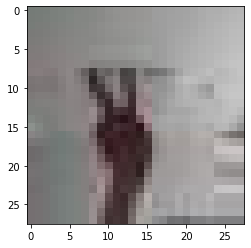

In [412]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 2. 딥러닝 네트워크 설계

In [413]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_126 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_127 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 64)                51264     
_________________________________________________________________
dense_101 (Dense)            (None, 3)               

In [414]:
print(x_train.shape)
print(y_train.shape)
print(x_train_norm.shape)

(300, 28, 28, 3)
(300,)
(300, 28, 28, 3)


### 2-2. 네트워크 학습 시키기

In [415]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0859 - accuracy: 0.3745
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9924 - accuracy: 0.6688
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8242 - accuracy: 0.7792
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6332 - accuracy: 0.7860
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4895 - accuracy: 0.8344
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7479
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2980 - accuracy: 0.9338
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.9277
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1440 - accuracy: 0.9978
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1198 - accuracy: 1.0000


# 3. 네트워크 test 해보기

### 3-1. test 데이터 생성 및 크기 변경

In [416]:
image_dir_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
resize_images(image_dir_path4)

print("테스트 이미지 resize 완료!")

300  images to be resized.
300  images resized.
테스트 이미지 resize 완료!


In [417]:
image_dir_path4 

'/aiffel/aiffel/rock_scissor_paper/test'

### 3-2. test 데이터 라벨 생성 및 전처리(정규화)

In [418]:
import numpy as np

def load_data2(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+ '/rock_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data2(image_dir_path4)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### 3-3. test 데이터를 predict 해보기

In [419]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 3.2110 - accuracy: 0.4800
test_loss: 3.2109639644622803 
test_accuracy: 0.47999998927116394


### <span style="color:red"> ※ 인식률이 생각보다 너무 낮음. </span>

# 4. 더 좋은 네트워크 만들어보기

### 4-1. 개선 방법 제시
     - 하이퍼 파라미터값 변경.
     - 학습 데이터 갯수 늘림.

### 4-2. 하이퍼 파라미터값 변경.

In [420]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(516, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_128 (MaxPoolin (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 256)             

In [421]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 7ms/step - loss: 1.1035 - accuracy: 0.3717
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 1.0727 - accuracy: 0.4732
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.8997 - accuracy: 0.7044
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.5188 - accuracy: 0.8190
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2599 - accuracy: 0.9367
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0573 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 8.1100e-04 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 4.4154e-04 - accuracy: 1.0000


In [422]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 9.5168 - accuracy: 0.3333
test_loss: 9.51679801940918 
test_accuracy: 0.3333333432674408


### <span style="color:red"> ※ 큰 변화는 없다. </span>

### 4-3. 학습 데이터 갯수 확장.

In [454]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new_train_data/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new_train_data/rock"
resize_images(image_dir_path2)
print("주먹 이미지 resize 완료!")

image_dir_path3 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new_train_data/paper"
resize_images(image_dir_path3)
print("보 이미지 resize 완료!")

1200  images to be resized.
1200  images resized.
가위 이미지 resize 완료!
1200  images to be resized.
1200  images resized.
주먹 이미지 resize 완료!
1200  images to be resized.
1200  images resized.
보 이미지 resize 완료!


In [455]:
def load_data3(img_path, number_of_data=3600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels


image_dir_path4 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new_train_data"
(x_train, y_train)=load_data3(image_dir_path4)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3600 입니다.
x_train shape: (3600, 28, 28, 3)
y_train shape: (3600,)


In [464]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_164 (Conv2D)          (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_158 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_159 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_160 (MaxPoolin (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_57 (Flatten)         (None, 128)             

In [471]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=20)


Epoch 1/20
113/113 [==============================] - 1s 4ms/step - loss: 0.0327 - accuracy: 0.9942
Epoch 2/20
113/113 [==============================] - 0s 4ms/step - loss: 5.1689e-04 - accuracy: 1.0000
Epoch 3/20
113/113 [==============================] - 0s 4ms/step - loss: 1.2880e-04 - accuracy: 1.0000
Epoch 4/20
113/113 [==============================] - 0s 4ms/step - loss: 8.2317e-05 - accuracy: 1.0000
Epoch 5/20
113/113 [==============================] - 1s 4ms/step - loss: 6.8840e-05 - accuracy: 1.0000
Epoch 6/20
113/113 [==============================] - 0s 4ms/step - loss: 6.0754e-05 - accuracy: 1.0000
Epoch 7/20
113/113 [==============================] - 0s 4ms/step - loss: 8.0615e-05 - accuracy: 1.0000
Epoch 8/20
113/113 [==============================] - 0s 4ms/step - loss: 5.4316e-05 - accuracy: 1.0000
Epoch 9/20
113/113 [==============================] - 0s 4ms/step - loss: 5.8300e-05 - accuracy: 1.0000
Epoch 10/20
113/113 [==============================] - 0s 4ms/step -

In [472]:
import numpy as np

def load_data3(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+ '/rock_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path5 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new_train_data/test"
(x_test, y_test)=load_data3(image_dir_path5)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트 데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


In [473]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 3.2639 - accuracy: 0.6367
test_loss: 3.263880968093872 
test_accuracy: 0.6366666555404663


### <span style="color:red"> ↑위의 인식률은 다시 돌렸더니 값이 바뀌었습니다. </span>

### <span style="color:red"> ※ 최종 인식률 : 0.6366666 </span>
![캡처](https://user-images.githubusercontent.com/66707865/134485279-5a231cb4-96dd-4613-9f22-78491603c11b.PNG)


## - 학습 데이터가 많을수록 인식률이 올라감.
## - 입력되는 데이터마다 특징이 다름.
## - 하이퍼 파라미터 값을 잘 맞춰야함.